## HW2: Linear Discriminant Analysis
In hw2, you need to implement [Fisher’s linear discriminant](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb) by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get **zero point** by simply calling `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` 

## Load data

In [159]:
import numpy as np

In [160]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

In [161]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3750, 2)
(3750,)
(1250, 2)
(1250,)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [162]:
## Your code HERE
x_C1, y_C1, x_C2, y_C2 = [], [], [], []

z = np.array
for a,b in zip(x_train,y_train):
    a = np.resize(a, (1,2))
    if(b==0):  # seperate data by class
        x_C1.append(a)
        y_C1.append(b)
    else:
        x_C2.append(a)
        y_C2.append(b)
x_C1 = np.array(x_C1)
x_C2 = np.array(x_C2)
y_C1 = np.array(y_C1)
y_C2 = np.array(y_C2)
# compute mean vector of each class
m1=x_C1.mean(axis=0)[0] 
m2=x_C2.mean(axis=0)[0]
print(m1,m1.shape)
print(m2,m2.shape)

[ 0.99253136 -0.99115481] (2,)
[-0.9888012   1.00522778] (2,)


In [163]:
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")

mean vector of class 1: [ 0.99253136 -0.99115481] mean vector of class 2: [-0.9888012   1.00522778]


## 2. Compute the Within-class scatter matrix SW

In [164]:
## Your code HERE
sw=0
m1 = np.resize(m1, (1,2))
m2 = np.resize(m2, (1,2))
# compute within-class scatter matrix for each class
for c1 in  x_C1: 
    sw += np.multiply((c1-m1),(c1-m1).T)
for c2 in  x_C2:
    sw += np.multiply((c2-m2),(c2-m2).T)
print(sw,sw.shape)


[[ 4337.38546493 -1795.55656547]
 [-1795.55656547  2834.75834886]] (2, 2)


In [165]:
print(f"Within-class scatter matrix SW: {sw}")

Within-class scatter matrix SW: [[ 4337.38546493 -1795.55656547]
 [-1795.55656547  2834.75834886]]


## 3.  Compute the Between-class scatter matrix SB

In [166]:
## Your code HERE
# compute between-class scatter matrix
sb = np.multiply((m2-m1),(m2-m1).T)

In [167]:
print(f"Between-class scatter matrix SB: {sb}")

Between-class scatter matrix SB: [[ 3.92567873 -3.95549783]
 [-3.95549783  3.98554344]]


## 4. Compute the Fisher’s linear discriminant

In [168]:
## Your code HERE

#print(sw )
inv = np.linalg.inv(sw) # inverse of sw
w = np.dot(inv, (m2-m1).T) # w = inv(sw)*transpose(m2-m1)
w = w / np.linalg.norm(w) # w's length=1
print(w)

...........
-0.00022399822698344034
0.000562369311444231
...........
[[-0.37003809]
 [ 0.92901658]]


In [169]:
print(f" Fisher’s linear discriminant: {w}")

 Fisher’s linear discriminant: [[-0.37003809]
 [ 0.92901658]]


## 5. Project the test data by linear discriminant and get the class prediction by `K` nearest-neighbor rule. Please report the accuracy score with `K` values from 1 to 5
you can use `accuracy_score` function from `sklearn.metric.accuracy_score`

In [170]:
import sklearn.metrics
# project x_in using w
def project(x_in):
    proj = [] # store the transformed(projected) x
    for x in x_in:
        proj.append(np.dot(w.T, x)) # project
    proj = np.array(proj)
    proj = np.resize(proj, (len(proj),)) 
    return proj

# compute distance between points(after projection)
def dist(v1, v2): 
    dist = (v1-v2)
    return abs(dist) # |v1-v2|

# get k nearest neighbors of the given point "test_vector"
def get_neighbors(k, train, test_vector):
    neighbors = [] # store all neighbors
    index = 0 
    for x in train:
        distance = dist(x, test_vector) # compute distance
        neighbors.append([distance, index]) 
        index +=1
    neighbors_sort = sorted(neighbors, key= lambda neighbors : neighbors[0]) # sort neighbors by distance
    return neighbors_sort[:k] # return first k neighbors

# knn with projected test data
def knn(test_proj, train_proj, y_train, k):
    pred = []
    K = k/2
    for x in test_proj: # each point in test data
        train_class = []
        neighbors = get_neighbors(k, train_proj, x) # get neighbors 
        for n in neighbors: # use index to find corresponding class of the neighbors
            train_class.append(y_train[n[1]])
        if (sum(train_class) > K): # decide the point's class by the neighbors' classes
            pred_class = 1 #if(class 1>50%)
        else: 
            pred_class = 0 #if(class 1<=50%)
        pred.append(pred_class)
    return pred

# project test and train data
proj_train = project(x_train)
proj_test = project(x_test)

# compute knn using k=(1~5)
y_pred1 = knn(proj_test, proj_train, y_train, 1)
y_pred2 = knn(proj_test, proj_train, y_train, 2)
y_pred3 = knn(proj_test, proj_train, y_train, 3)
y_pred4 = knn(proj_test, proj_train, y_train, 4)
y_pred5 = knn(proj_test, proj_train, y_train, 5)

# compute accuracy
acc1 = sklearn.metrics.accuracy_score(y_test, y_pred1)
acc2 = sklearn.metrics.accuracy_score(y_test, y_pred2)
acc3 = sklearn.metrics.accuracy_score(y_test, y_pred3)
acc4 = sklearn.metrics.accuracy_score(y_test, y_pred4)
acc5 = sklearn.metrics.accuracy_score(y_test, y_pred5)


In [221]:
print(f"K=1: Accuracy of test-set {acc1}")
print(f"K=2: Accuracy of test-set {acc2}")
print(f"K=3: Accuracy of test-set {acc3}")
print(f"K=4: Accuracy of test-set {acc4}")
print(f"K=5: Accuracy of test-set {acc5}")

K=1: Accuracy of test-set 0.8488
K=2: Accuracy of test-set 0.8704
K=3: Accuracy of test-set 0.8792
K=4: Accuracy of test-set 0.8824
K=5: Accuracy of test-set 0.8912


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

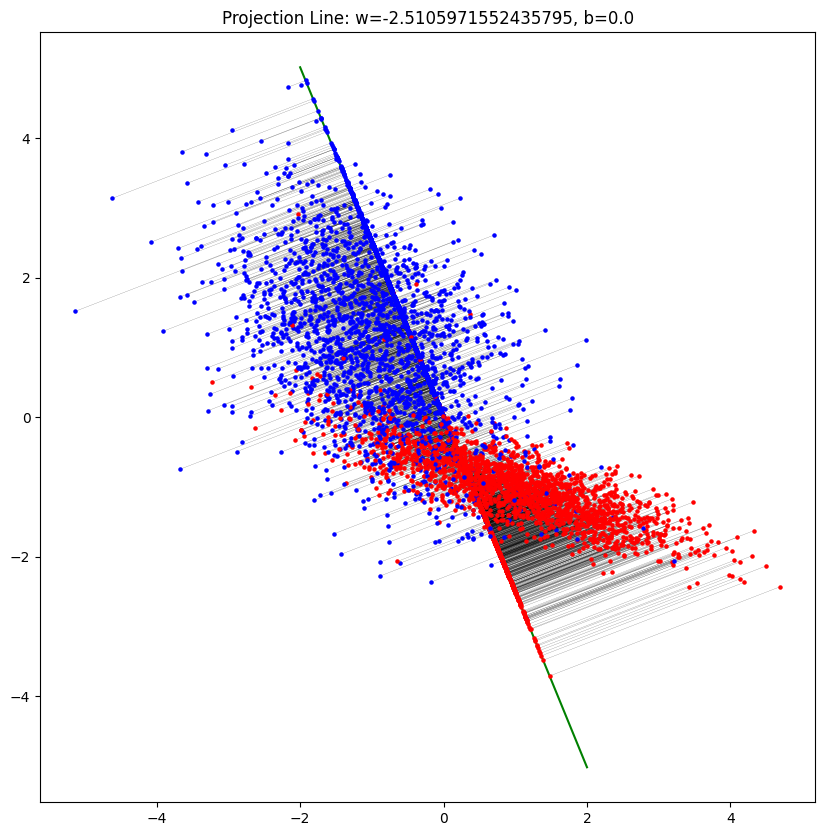

In [230]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
colors=['red','blue']

slope = w[1]/w[0] # compute slope
x = np.linspace(-2,2,20)
y = slope*x+0
plt.plot(x,y, '-g') # draw projection line
plt.title("Projection Line: w="+str(slope[0])+", b=0.0")
for point, pred in zip(x_train, y_train):
    point_project = (np.dot(point,w)*w) / np.dot(w.T, w) # project point
    # draw points and lines
    plt.plot( [point_project[0], point[0]],[point_project[1], point[1]], color='black', linewidth=0.1,zorder=1) 
    plt.scatter(point_project[0], point_project[1], color=colors[pred], s=5, zorder=2)
    plt.scatter(point[0],point[1],color=colors[pred], s=5, zorder=3)
plt.show()